<a href="https://colab.research.google.com/github/Praneeth-18/NLP/blob/main/Movie_Genre_Classification_based_on_their_plot_summaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Narrative**

**Overview: Movie Genre Classification Based on Plot Summaries**

The Movie Genre Classification task aimed to explore and analyze movie plot summaries to classify movies into genres. This task leveraged natural language processing (NLP) and machine learning (ML) techniques to understand the thematic elements of movies, identify patterns within plot summaries, and predict genres based on textual content.

**Data Collection and Preparation**

The task began with collecting movie plot summaries and their corresponding genres. For demonstration purposes, hypothetical genres were assigned to a set of movies including "The Shawshank Redemption," "Inception," "Psycho," and "Toy Story." Each movie summary was preprocessed to create a clean, standardized textual dataset suitable for analysis. This preprocessing involved removing punctuation, making text lowercase, tokenizing text, and removing stopwords. The result was a clean dataset ready for exploratory data analysis (EDA) and further NLP tasks.

**Exploratory Data Analysis (EDA)**

The initial phase of EDA involved analyzing word frequencies, creating word clouds, and examining the size of each movie's vocabulary to glean insights into the content and style of the plot summaries. This step was crucial for understanding the distribution of words and identifying any additional stopwords that might need to be excluded from the analysis.

**Sentiment Analysis**

Sentiment analysis was performed to evaluate the emotional tone of each plot summary. By assessing the polarity and subjectivity of the text, we gained insights into the overall sentiment conveyed in the summaries. This analysis revealed the positive, negative, or neutral attitudes within the summaries and how subjective or opinionated the language was. Visualizing sentiment analysis results helped in understanding the sentiment distribution across movies.

**Topic Modeling**

Latent Dirichlet Allocation (LDA) was employed for topic modeling, aiming to uncover latent thematic structures within the plot summaries. By converting the text data into a document-term matrix and fitting an LDA model, we identified several topics represented across the movie summaries. Adjusting the number of topics and interpreting the model's output allowed us to extract meaningful themes that could be associated with specific genres or narrative styles.

**Genre Classification**

With a prepared dataset and insights from the EDA, sentiment analysis, and topic modeling, we moved to the core objective of the task: genre classification. The genres were encoded into numerical labels, and the text data was vectorized using TF-IDF to transform the plot summaries into a format suitable for machine learning models. A Naive Bayes classifier was trained on the dataset, demonstrating the feasibility of predicting movie genres based on plot summaries. The model's performance was evaluated, and its predictive capabilities were showcased through genre prediction for new movie summaries.

**Text Generation**

As a creative exploration, we implemented a basic text generation model using Markov chains based on the plot summary of "The Shawshank Redemption." This model generated new text in a style mimicking the original summary, providing a fun and insightful look into text generation techniques.

### **Conclusion**

Throughout the Movie Genre Classification task, we applied a series of NLP and ML techniques to analyze movie plot summaries and predict their genres. From initial data cleaning and EDA to sentiment analysis, topic modeling, and finally, genre classification, each step contributed to a deeper understanding of how textual content can be analyzed and utilized for predictive modeling. The project not only achieved its goal of classifying movies into genres based on their plot summaries but also highlighted the power and potential of NLP in extracting meaningful insights from text data.

# **Getting The Data**

First, we identify the Wikipedia pages for the movies that we are interested in analyzing. For this example, we're looking at "The Shawshank Redemption," "Inception," "Psycho," and "Toy Story."

Scraping Wikipedia Data:

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pickle

# Create a directory for summaries if it doesn't exist
if not os.path.exists('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/DashOfData_Praneeth/summaries'):
    os.makedirs('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/DashOfData_Praneeth/summaries')

def url_to_wiki_summary(url):
    '''Scrapes the plot summary from a Wikipedia page.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    summary_text = ''
    # Attempt to find the plot summary section, may need adjustment based on Wikipedia's structure
    for section in soup.find_all('h2'):
        if 'Plot' in section.text:
            content = section.find_next_sibling('p')
            while content:
                summary_text += content.text
                content = content.find_next_sibling()
                if content and content.name != 'p':
                    break
    return summary_text

# Define Wikipedia URLs and movie names
urls = [
    'https://en.wikipedia.org/wiki/The_Shawshank_Redemption',
    'https://en.wikipedia.org/wiki/Inception',
    'https://en.wikipedia.org/wiki/Psycho_(1960_film)',
    'https://en.wikipedia.org/wiki/Toy_Story'
]
movies = ['shawshank_redemption', 'inception', 'psycho', 'toy_story']

# Scrape plot summaries
summaries = [url_to_wiki_summary(u) for u in urls]

# Save summaries with pickle
for i, movie in enumerate(movies):
    with open(f'/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/DashOfData_Praneeth/summaries/{movie}.txt', "wb") as file:
        pickle.dump(summaries[i], file)


# **Cleaning the data**

With the text data for movie summaries, we now proceed to clean this data. The cleaning steps focus on making text lowercase, removing punctuation, numerical values.

In [ ]:
import pandas as pd
import re
import string

# Load scraped summaries
data = {}
for movie in movies:
    with open(f'/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/DashOfData_Praneeth/summaries/{movie}.txt', "rb") as file:
        data[movie] = pickle.load(file)

# Convert to DataFrame for easier manipulation
data_df = pd.DataFrame.from_dict(data, orient='index', columns=['summary'])
data_df.index.name = 'movie'
data_df.reset_index(inplace=True)

# Define cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text

# Clean summaries
data_df['clean_summary'] = data_df['summary'].apply(clean_text)

# Pickle the cleaned data
data_df.to_pickle("/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/DashOfData_Praneeth/clean_summaries.pkl")


# **EDA**

Loading cleaned data

In [ ]:
import pandas as pd

# Path to the cleaned summaries
clean_summaries_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/DashOfData_Praneeth/clean_summaries.pkl'

# Load the DataFrame
data_df = pd.read_pickle(clean_summaries_path)


Word Count Distribution


<ipython-input-6-6b7a6d68dd71>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['word_count'], kde=False, bins=20, color='blue')


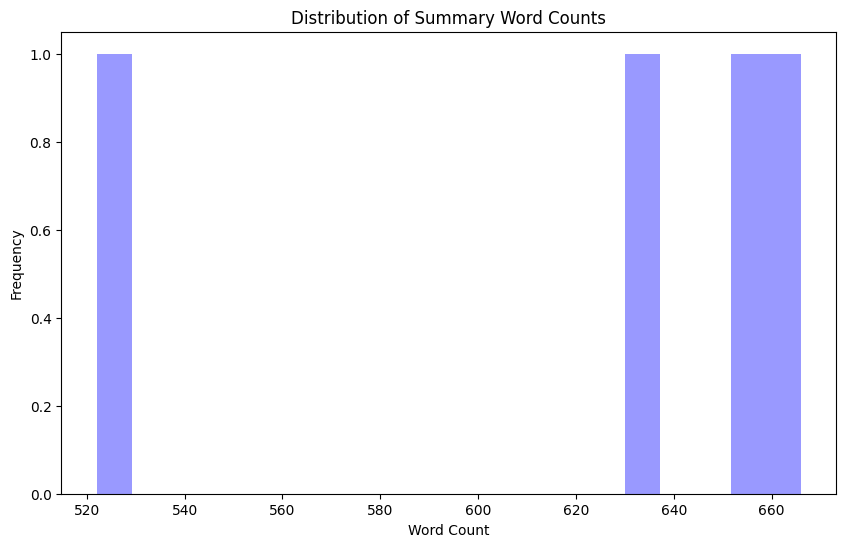

In [ ]:
data_df['word_count'] = data_df['clean_summary'].apply(lambda x: len(x.split()))

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.distplot(data_df['word_count'], kde=False, bins=20, color='blue')
plt.title('Distribution of Summary Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Most common words

<ipython-input-7-475c4e153f24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_words], y=[x[0] for x in top_words], palette='viridis')


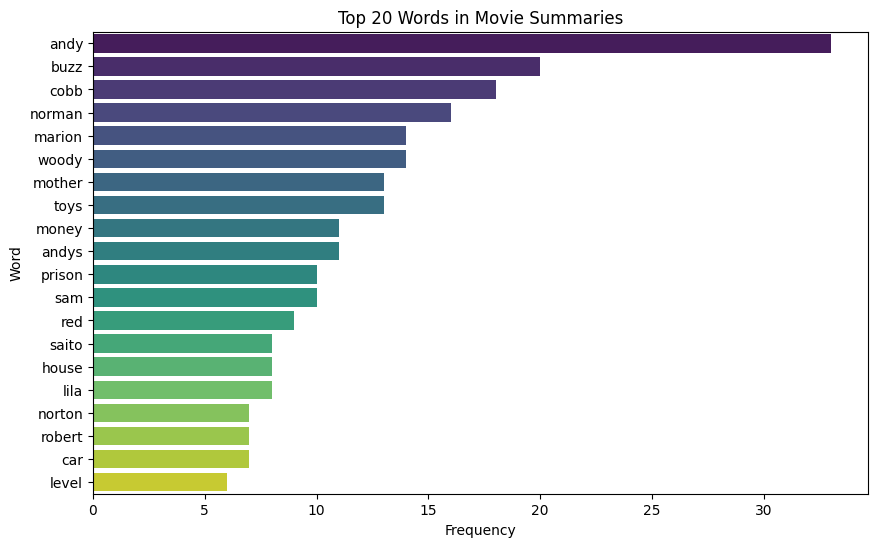

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Instantiate CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_df['clean_summary'])
sum_words = data_cv.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Top 20 words
top_words = words_freq[:20]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in top_words], y=[x[0] for x in top_words], palette='viridis')
plt.title('Top 20 Words in Movie Summaries')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


Word clouds

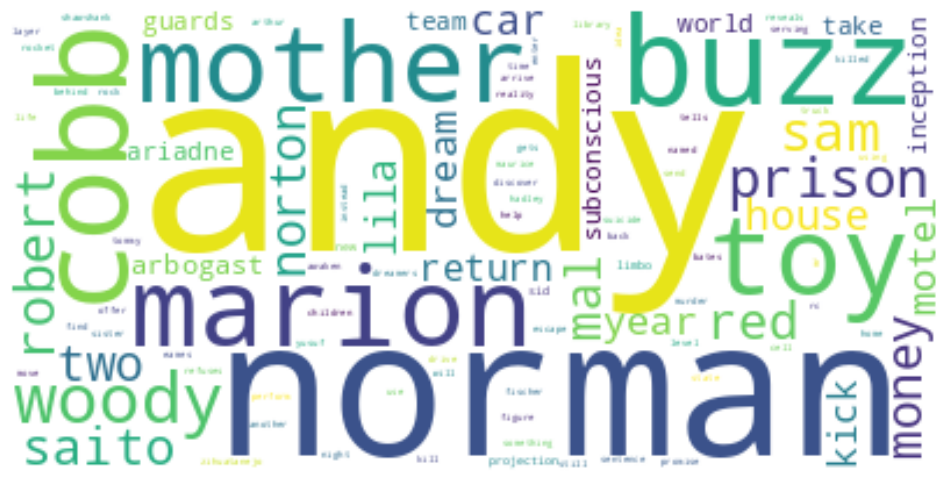

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')

# Combine all summaries into one big text and generate word cloud
big_summary_text = ' '.join(data_df['clean_summary'])
wordcloud.generate(big_summary_text)

# Display the generated image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Document-Term Matrix (DTM)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming `data_df` is your DataFrame and 'clean_summary' contains the cleaned movie summaries
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_df['clean_summary'])
dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Transpose DTM for easier analysis of each movie
dtm = dtm.transpose()


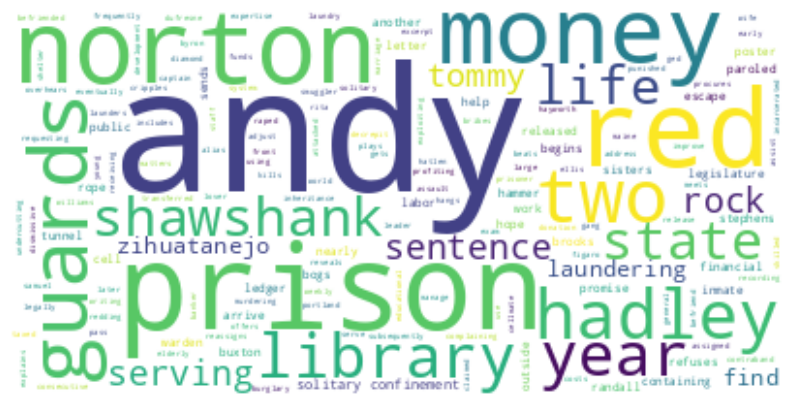

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Generate a word cloud for the first movie as an example
wc = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wc.generate_from_text(data_df['clean_summary'][0])

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Sentiment Analysis**

We will apply sentiment analysis to the cleaned movie summaries to find the overall sentiment conveyed in each summary.

In [ ]:
!pip install textblob
from textblob import TextBlob

In [ ]:
# Function to calculate sentiment
def calculate_sentiment(text: str) -> float:
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

# Apply the function to your DataFrame
data_df['sentiment'] = data_df['clean_summary'].apply(calculate_sentiment)

# View the first few entries to verify
data_df[['movie', 'sentiment']].head()

,movie,sentiment
0,shawshank_redemption,0.021825
1,inception,0.015397
2,psycho,-0.025556
3,toy_story,0.050913


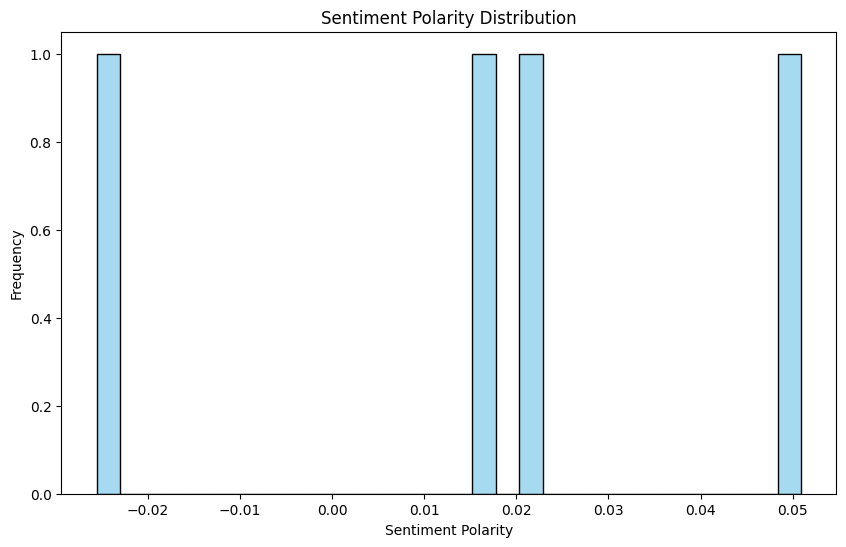

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_df['sentiment'], bins=30, kde=False, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

This visualization helps in understanding the overall sentiment leaning of the movie summaries. For example, a skew towards positive values might indicate that movie summaries tend to highlight positive aspects or plot points of the movies.

Overall Sentiment Measurement


In [ ]:
from textblob import TextBlob

# Define functions for calculating polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Apply the functions to your DataFrame
data_df['polarity'] = data_df['clean_summary'].apply(pol)
data_df['subjectivity'] = data_df['clean_summary'].apply(sub)


In [ ]:
print(data_df.head())


                  movie                                            summary  \
0  shawshank_redemption  In early 1947, Portland, Maine, banker Andy Du...   
1             inception  Cobb and Arthur are "extractors" who perform c...   
2                psycho  Phoenix real estate secretary Marion Crane ste...   
3             toy_story  Sentient when humans are not around, a group o...   

                                       clean_summary  word_count  sentiment  \
0  in early  portland maine banker andy dufresne ...         666   0.021825   
1  cobb and arthur are extractors who perform cor...         654   0.015397   
2  phoenix real estate secretary marion crane ste...         631  -0.025556   
3  sentient when humans are not around a group of...         522   0.050913   

   topic  polarity  subjectivity  
0      0  0.021825      0.218824  
1      1  0.015397      0.349447  
2      3 -0.025556      0.251111  
3      4  0.050913      0.427062  


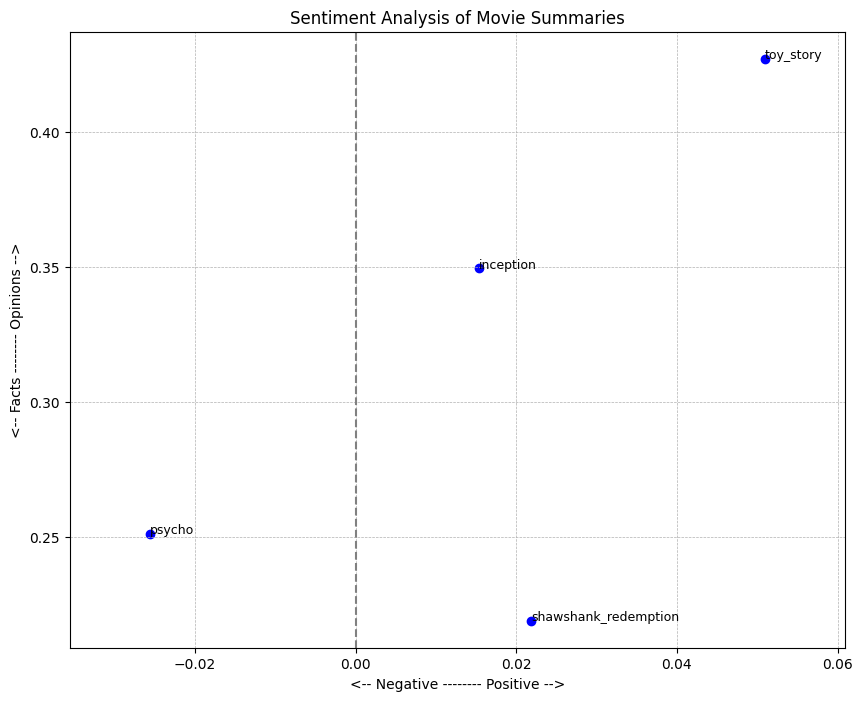

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Scatter plot for polarity and subjectivity
for index, row in data_df.iterrows():
    plt.scatter(row['polarity'], row['subjectivity'], color='blue')
    plt.text(row['polarity'], row['subjectivity'], row['movie'], fontsize=9)

plt.title('Sentiment Analysis of Movie Summaries')
plt.xlabel('<-- Negative -------- Positive -->')
plt.ylabel('<-- Facts -------- Opinions -->')
plt.xlim(data_df['polarity'].min() - 0.01, data_df['polarity'].max() + 0.01)
plt.ylim(data_df['subjectivity'].min() - 0.01, data_df['subjectivity'].max() + 0.01)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# **Topic Modeling**

In [ ]:
from gensim import models

LDA = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating the document-term matrix
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data_df['clean_summary'])

In [ ]:
num_topics = 4
num_words = 10

# Fetching the words for each topic
for i in range(num_topics):
    words = LDA.show_topic(i, topn=num_words)
    topic_words = [word for word, prob in words]
    print(f"Top 10 words for topic #{i}: {topic_words}\n")

Top 10 words for topic #0: ['andys', 'andy', 'new', 'car', 'house', 'takes', 'gets', 'pursue', 'crane', 'mother']

Top 10 words for topic #1: ['andy', 'money', 'world', 'andys', 'reveals', 'years', 'finds', 'using', 'dreams', 'kills']

Top 10 words for topic #2: ['mother', 'house', 'money', 'killed', 'figure', 'car', 'discovers', 'home', 'sheriff', 'tells']

Top 10 words for topic #3: ['return', 'named', 'world', 'death', 'home', 'mother', 'discovers', 'forcing', 'real', 'house']



In [ ]:
topic_results = LDA.transform(dtm)
data_df['topic'] = topic_results.argmax(axis=1)


In [ ]:
data_df.to_pickle("/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/DashOfData_Praneeth/processed_movie_data.pkl")


In [ ]:
from gensim import matutils, models
import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer

# Assuming `data_df['clean_summary']` is your preprocessed text data
cv = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
data_cv = cv.fit_transform(data_df['clean_summary'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
tdm = data_dtm.transpose()

# Convert to gensim format
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
# Choose the number of topics
num_topics = 4

# Create the LDA model
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10)

# Print the identified topics
for i, topic in lda.print_topics():
    print(f'Topic #{i}: {topic}')


Topic #0: 0.060*"world" + 0.058*"named" + 0.057*"return" + 0.043*"home" + 0.043*"real" + 0.032*"kills" + 0.032*"dreams" + 0.032*"using" + 0.032*"forcing" + 0.032*"instead"
Topic #1: 0.016*"andy" + 0.014*"money" + 0.014*"andys" + 0.014*"world" + 0.014*"finds" + 0.014*"reveals" + 0.014*"kills" + 0.014*"named" + 0.014*"years" + 0.014*"using"
Topic #2: 0.091*"andys" + 0.079*"andy" + 0.053*"car" + 0.053*"new" + 0.041*"house" + 0.041*"takes" + 0.028*"crane" + 0.028*"gets" + 0.028*"pursue" + 0.016*"mother"
Topic #3: 0.161*"andy" + 0.071*"mother" + 0.066*"money" + 0.030*"house" + 0.025*"andys" + 0.024*"years" + 0.019*"escape" + 0.019*"cell" + 0.019*"refuses" + 0.019*"car"


In [ ]:
data_df.head()

,movie,summary,clean_summary,word_count,sentiment,topic,polarity,subjectivity
0,shawshank_redemption,"In early 1947, Portland, Maine, banker Andy Du...",in early portland maine banker andy dufresne ...,666,0.021825,0,0.021825,0.218824
1,inception,"Cobb and Arthur are ""extractors"" who perform c...",cobb and arthur are extractors who perform cor...,654,0.015397,1,0.015397,0.349447
2,psycho,Phoenix real estate secretary Marion Crane ste...,phoenix real estate secretary marion crane ste...,631,-0.025556,3,-0.025556,0.251111
3,toy_story,"Sentient when humans are not around, a group o...",sentient when humans are not around a group of...,522,0.050913,4,0.050913,0.427062


In [ ]:
data_df['genre'] = ['Drama', 'Science Fiction', 'Thriller', 'Animation']

In [ ]:
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Attempt #2: Topic Modeling with Nouns Only**


In [ ]:
def nouns_only(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

# Apply the function to your clean summaries
data_df['nouns_only'] = data_df['clean_summary'].apply(nouns_only)

In [ ]:
cv_nouns = CountVectorizer(stop_words='english')
data_cv_nouns = cv_nouns.fit_transform(data_df['nouns_only'])
data_dtm_nouns = pd.DataFrame(data_cv_nouns.toarray(), columns=cv_nouns.get_feature_names_out())
data_dtm_nouns.index = data_df.index

# Convert to Gensim format
corpus_nouns = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm_nouns.transpose()))
id2word_nouns = dict((v, k) for k, v in cv_nouns.vocabulary_.items())

# LDA model
lda_nouns = models.LdaModel(corpus=corpus_nouns, num_topics=4, id2word=id2word_nouns, passes=10)
lda_nouns.print_topics()

[(0,
  '0.051*"marion" + 0.036*"mother" + 0.026*"sam" + 0.022*"motel" + 0.022*"norman" + 0.019*"house" + 0.015*"money" + 0.015*"lila" + 0.012*"car" + 0.012*"figure"'),
 (1,
  '0.003*"woody" + 0.003*"buzz" + 0.003*"toys" + 0.003*"prison" + 0.003*"money" + 0.003*"andy" + 0.003*"rocket" + 0.003*"car" + 0.003*"sid" + 0.003*"truck"'),
 (2,
  '0.050*"buzz" + 0.050*"woody" + 0.043*"toys" + 0.016*"car" + 0.016*"truck" + 0.016*"sid" + 0.016*"rocket" + 0.012*"house" + 0.012*"head" + 0.012*"toy"'),
 (3,
  '0.030*"cobb" + 0.019*"andy" + 0.019*"prison" + 0.015*"money" + 0.013*"level" + 0.013*"saito" + 0.011*"inception" + 0.011*"world" + 0.011*"team" + 0.011*"guards"')]

**Attempt #3: Topic Modeling with Nouns and Adjectives**


In [ ]:
def nouns_adjectives(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] in ['NN', 'JJ']
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

# Apply the function to your clean summaries
data_df['nouns_adj'] = data_df['clean_summary'].apply(nouns_adjectives)

In [ ]:
cv_nouns_adj = CountVectorizer(stop_words='english')
data_cv_nouns_adj = cv_nouns_adj.fit_transform(data_df['nouns_adj'])
data_dtm_nouns_adj = pd.DataFrame(data_cv_nouns_adj.toarray(), columns=cv_nouns_adj.get_feature_names_out())
data_dtm_nouns_adj.index = data_df.index

# Convert to Gensim format
corpus_nouns_adj = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm_nouns_adj.transpose()))
id2word_nouns_adj = dict((v, k) for k, v in cv_nouns_adj.vocabulary_.items())

# LDA model
lda_nouns_adj = models.LdaModel(corpus=corpus_nouns_adj, num_topics=4, id2word=id2word_nouns_adj, passes=10)
lda_nouns_adj.print_topics()

[(0,
  '0.046*"buzz" + 0.043*"woody" + 0.040*"toys" + 0.019*"andy" + 0.013*"sid" + 0.013*"rocket" + 0.013*"new" + 0.013*"toy" + 0.013*"car" + 0.013*"truck"'),
 (1,
  '0.041*"marion" + 0.036*"norman" + 0.030*"mother" + 0.024*"sam" + 0.021*"lila" + 0.018*"motel" + 0.015*"house" + 0.012*"money" + 0.012*"arbogast" + 0.012*"normans"'),
 (2,
  '0.002*"cobb" + 0.002*"andy" + 0.002*"buzz" + 0.002*"woody" + 0.002*"toys" + 0.002*"saito" + 0.002*"inception" + 0.002*"level" + 0.002*"projection" + 0.002*"world"'),
 (3,
  '0.033*"andy" + 0.025*"cobb" + 0.017*"prison" + 0.015*"red" + 0.012*"saito" + 0.012*"money" + 0.010*"level" + 0.010*"norton" + 0.009*"subconscious" + 0.009*"team"')]

# **Making Predictions**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_df['genre_encoded'] = le.fit_transform(data_df['genre'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data_df['clean_summary'], data_df['genre_encoded'], test_size=0.25, random_state=42)

# Vectorizing the summaries
tfidf = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Making predictions
y_pred = model.predict(X_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
def predict_genre(summary):
    summary_tfidf = tfidf.transform([summary])
    genre_encoded = model.predict(summary_tfidf)[0]
    return le.inverse_transform([genre_encoded])[0]

# Example prediction
new_summary = "A group of toys, led by a cowboy and a space ranger, embark on adventures while trying to not get caught by humans."
predicted_genre = predict_genre(new_summary)
print(f"Predicted Genre: {predicted_genre}")

Predicted Genre: Animation


# **Text Generation**

In [ ]:
import pandas as pd
from collections import defaultdict
import random

In [ ]:
# For demonstration, let's use the "clean_summary" of "The Shawshank Redemption"
example_text = data_df.loc[data_df['movie'] == 'shawshank_redemption', 'clean_summary'].values[0]

In [ ]:
from collections import defaultdict

def markov_chain(text):
    words = text.split(' ')
    m_dict = defaultdict(list)

    for current_word, next_word in zip(words[:-1], words[1:]):
        m_dict[current_word].append(next_word)

    m_dict = dict(m_dict)
    return m_dict

# Create the Markov chain for our example text
example_dict = markov_chain(example_text)

In [ ]:
import random

def generate_sentence(chain, count=20):
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    sentence += '.'
    return sentence

# Generate a new sentence
new_summary = generate_sentence(example_dict)
print(new_summary)

Outside prison laundry andy explains to worse conditions andy dufresne arrives at shawshank while norton meets andy that he is.
